<a href="https://colab.research.google.com/github/CO-CO-LAB/Exploratory-Data-Analysis/blob/main/Data_Cleaning_Data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab I am going to:

* Handle missing data in different ways
* Correct the data type of different data values as per requirement
* Standardize and normalize the appropriate data attributes
* Visualize the data as grouped bar graph using Binning
* Converting a categorical data into numerical indicator variables

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [4]:
df = pd.read_csv(file_path, header=0)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [6]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [7]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)

To see which columns have missing data.

In [8]:
missing_data=df.isnull()
print(missing_data.head())
for column in missing_data.columns:
    print(missing_data[column].value_counts())
    print("")

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: in

Replacing the missing values of weight with the average value of the attribute.

In [9]:
avg = df["Weight_kg"].astype('float').mean()
df["Weight_kg"].fillna(avg, inplace=True)

<ipython-input-9-029709f5fa91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].fillna(avg, inplace=True)


checking to see the missing value in this column

In [10]:
missing_data=df["Weight_kg"].isnull()
print(missing_data.value_counts())

Weight_kg
False    238
Name: count, dtype: int64


In [11]:
freq = df["Screen_Size_cm"].value_counts().idxmax()
df["Screen_Size_cm"].fillna(freq, inplace = True)

<ipython-input-11-9f6744917b2a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].fillna(freq, inplace = True)


In [12]:
missing_data=df["Screen_Size_cm"].isnull()
print(missing_data.value_counts())

Screen_Size_cm
False    238
Name: count, dtype: int64


Changing the format of columns, Weight_kg and Screen_Size_cm

In [13]:
df["Weight_kg"]= df["Weight_kg"].astype('float')
df["Screen_Size_cm"]= df["Screen_Size_cm"].astype('float')
# or df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype('float')

In [14]:
print(df.dtypes)

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object


#### Data Standardization
Since value of Screen_size usually has a standard unit of inches and weight of the laptop is needed to be in pounds, we have to modify the columns of the dataframe accordingly.

In [15]:
df["Weight_kg"]= df["Weight_kg"]*2.205
df.rename(columns={"Weight_kg" : "Weight_pounds"}, inplace=True)
df["Screen_Size_cm"]= df["Screen_Size_cm"]/2.54
df.rename(columns={"Screen_Size_cm": "Screen_Size_inch"}, inplace=True)

#### Data Normalization
Normalizing the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [16]:
df["CPU_frequency"]= df["CPU_frequency"]/df["CPU_frequency"].max() # I used simple feature scaling normalization

### Binning
We want to change the numerical attribute "Price" into categorical by binning and use a bar chart to show the prices as "low", "midium" or "high".

In [22]:
Bins= np.linspace(df["Price"].min(), df["Price"].max(), 4)
names= ["low", "midium" , "high"]
df["binned_Price"]=pd.cut(df["Price"] , Bins, labels= names, include_lowest=True)

Now by ploting the "Binned_Price" in a bar chart we can see the distribution of this attribute.

Text(0.5, 1.0, 'Price distribution')

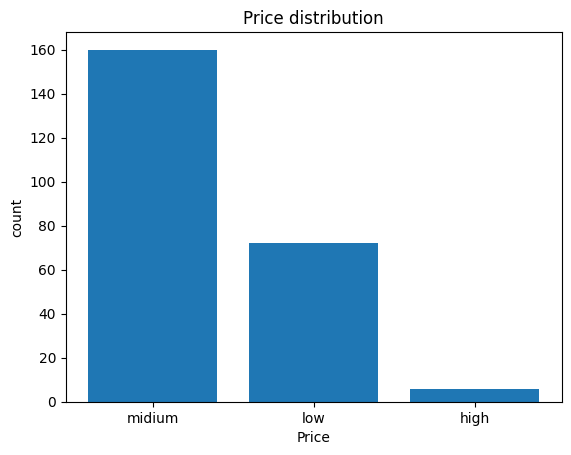

In [23]:
plt.bar(names, df["binned_Price"].value_counts() )
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price distribution")

And now converting the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then dropping the "Screen" attribute from the dataset.

In [24]:
# chaging the categorical attributes to numerical for some statistical and ML modelling
dummy= pd.get_dummies(df["Screen"])
dummy.rename(columns={"Full HD": "Screen-Full_HD" , "IPS Panel":"Screen-IPS_panel"}, inplace=True)
df= pd.concat([df, dummy], axis=1)
df.drop("Screen", axis=1, inplace=True)

In [25]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price binned_Price  \
0       0.551724       8             256        3.52800    978       midium   
1       0.689655       4             256        4.85100    634       midium   
2       0.931034       8             256        4.85100    946       midium   
3       0.551724       8             128        2.69010   1244       midium   
4       0.620690       8             256        4.21155    837       midium   

   Screen-Full_HD  Screen-IPS_panel  
0           False       